In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib
from textwrap import wrap
from matplotlib import ticker
from datetime import datetime


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline


## Importing the data



In [2]:
#print(os.listdir('../data'))
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
#df = df.set_index('Date', append=False)
#df['Date'] = df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y').date(), axis=1) #convert the date
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df['Date'] = pd.to_datetime(df['Date'])    
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df.head()

,Date,Cases,date_delta
0,2020-03-01,1,0.0
1,2020-03-12,1,11.0
2,2020-03-19,1,18.0
3,2020-03-23,1,22.0
4,2020-03-27,2,26.0


In [3]:
#print(os.listdir('../data'))
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
#df = df.set_index('Date', append=False)
#df['Date'] = df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y').date(), axis=1) #convert the date
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df.head()

,Date,Cases
0,2020-03-01,1
1,2020-03-12,1
2,2020-03-19,1
3,2020-03-23,1
4,2020-03-27,2


In [4]:
df.describe()

,Cases
count,34.000000
mean,32.676471
std,40.533354
min,1.000000
25%,2.000000
50%,18.500000
75%,53.500000
max,181.000000


In [5]:
df.describe(include='O')

,Date
count,34
unique,34
top,2020-04-24
freq,1


In [6]:
df.columns

Index(['Date', 'Cases'], dtype='object')

In [7]:
df.shape

(34, 2)

In [8]:
#print('Time period start: {}\nTime period end: {}'.format(df.year.min(),df.year.max()))

## Visualizing the time series data

We are going to use matplotlib to visualise the dataset.

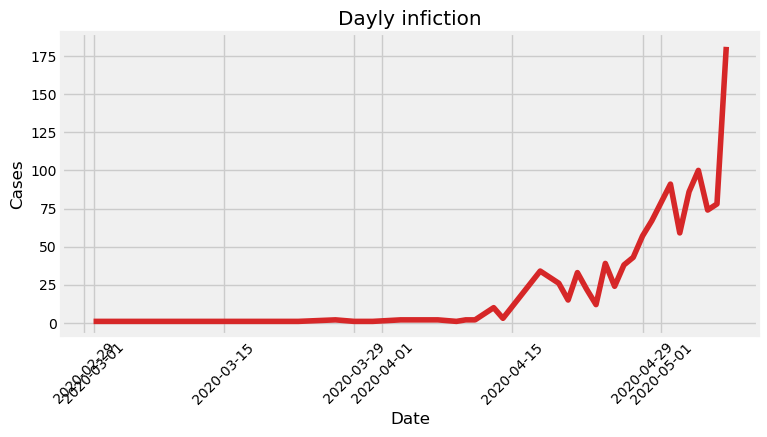

In [9]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('../data/NumberConfirmedOfCases.csv', parse_dates=['Date'], index_col='Date')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Cases', dpi=100,angle=45):
    plt.figure(figsize=(8,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=angle)
    plt.show()

plot_df(df, x=df.Date, y=df.Cases, title='Dayly infiction')    

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Date'].head()

0   2020-03-01
1   2020-03-12
2   2020-03-19
3   2020-03-23
4   2020-03-27
Name: Date, dtype: datetime64[ns]

In [11]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2020-03-01', '2020-03-12', '2020-03-19', '2020-03-23',
               '2020-03-27', '2020-03-29', '2020-03-31', '2020-04-03',
               '2020-04-05', '2020-04-07', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-13', '2020-04-14', '2020-04-18',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

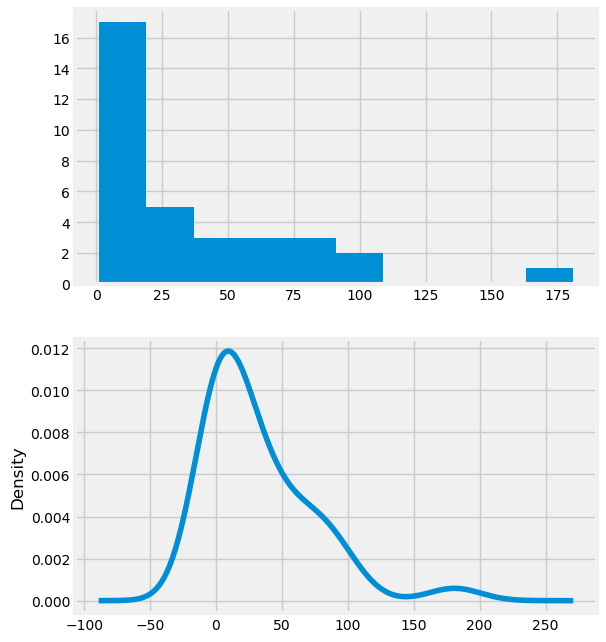

In [12]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(figsize=(6,8), dpi= 100)
pyplot.subplot(211)
df.Cases.hist()
pyplot.subplot(212)
df.Cases.plot(kind='kde')
pyplot.show()

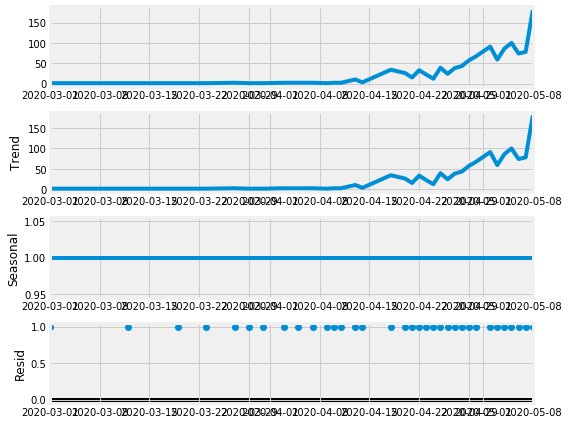

In [13]:
from pylab import rcParams

df = pd.read_csv('../data/NumberConfirmedOfCases.csv', parse_dates=['Date'], index_col='Date')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.set_index('Date')


rcParams['figure.figsize'] = 8,6
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative', freq=1)
fig = decomposition.plot()
plt.show()

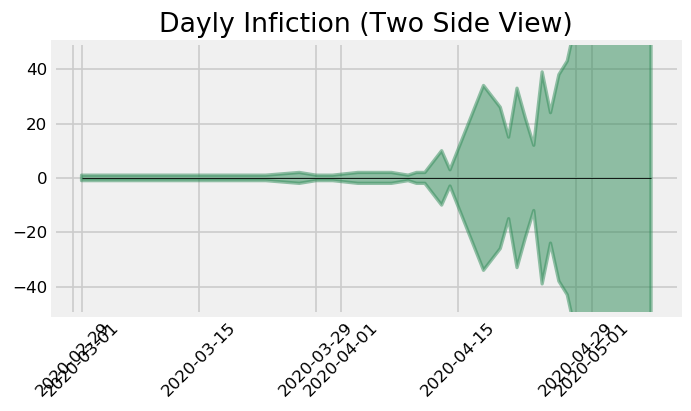

In [14]:
df = pd.read_csv('../data/NumberConfirmedOfCases.csv', parse_dates=['Date'], index_col='Date')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

x = df['Date'].values
y1 = df['Cases'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(6,3), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-50, 50)
plt.title('Dayly Infiction (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=.5)
plt.xticks(rotation=45)
plt.show()

## Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has higher drug sales, which can be attributed to the holiday discounts season.

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

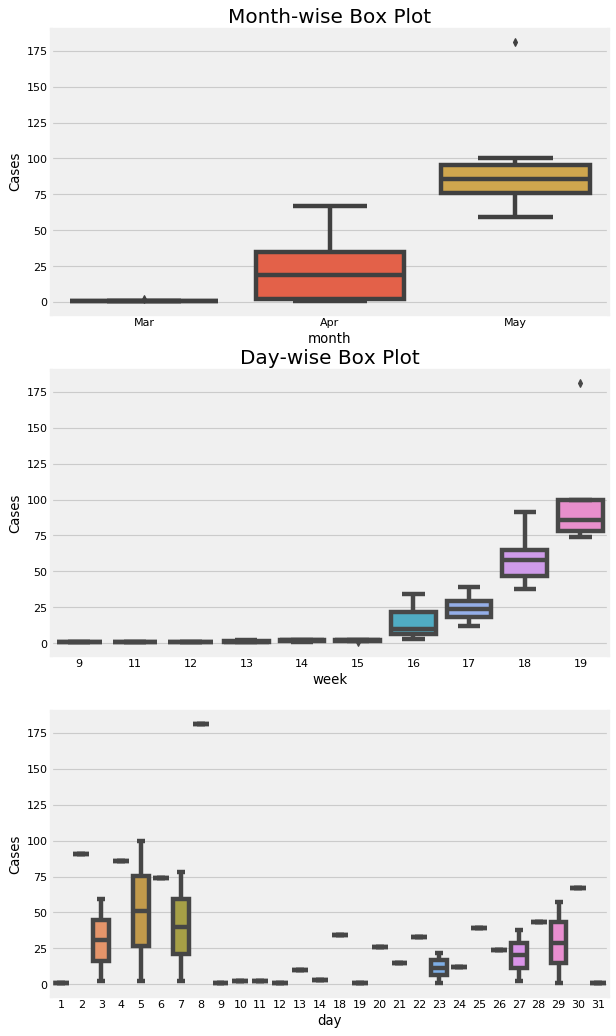

In [15]:
# Importing the data
df = pd.read_csv('../data/NumberConfirmedOfCases.csv', parse_dates=['Date'], index_col='Date')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df.reset_index(inplace=True)

# Prepare data
#df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
df['day']=df['Date'].dt.day
df['week']=df['Date'].dt.week
months = df['month'].unique()

# Plotting
fig, axes = plt.subplots(3,1, figsize=(8,16), dpi= 80)
sns.boxplot(x='month', y='Cases', data=df, ax=axes[0])
sns.boxplot(x='week', y='Cases', data=df,ax=axes[1])
sns.boxplot(x='day', y='Cases', data=df,ax=axes[2])
axes[0].set_title('Month-wise Box Plot', fontsize=18); 
axes[1].set_title('Week-wise Box Plot', fontsize=18)
axes[1].set_title('Day-wise Box Plot', fontsize=18)

plt.show()

## Autocorrelation and partial autocorrelation

Autocorrelation measures the relationship between a variable's current value and its past values.

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

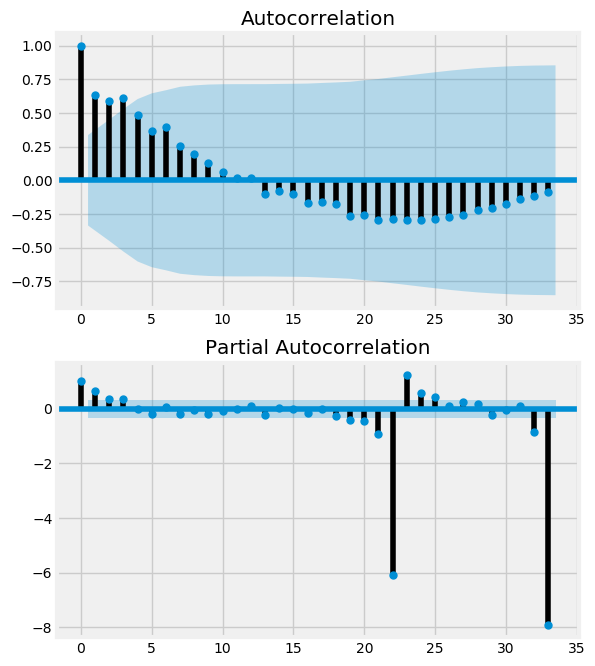

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data


pyplot.figure(figsize=(6,8), dpi= 100)
pyplot.subplot(211)
plot_acf(df.Cases, ax=pyplot.gca(), lags = len(df.Cases)-1)
pyplot.subplot(212)
plot_pacf(df.Cases, ax=pyplot.gca(), lags = len(df.Cases)-1)
pyplot.show()

## Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

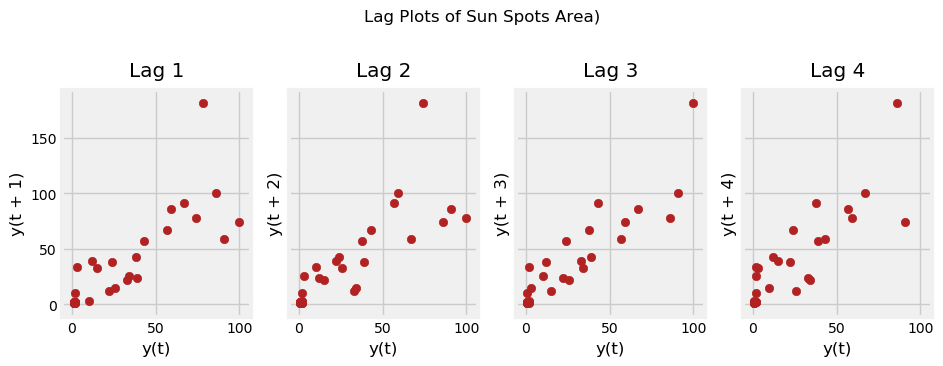

In [17]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.Cases, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    fig.suptitle('Lag Plots of Sun Spots Area)', y=1.15)    



## Estimating the forecastability

The more regular and repeatable patterns a time series has, the easier it is to forecast. Since we have a small dataset, we apply a Sample Entropy to examine that. Put in mind that, The higher the approximate entropy, the more difficult it is to forecast it.





In [18]:
# https://en.wikipedia.org/wiki/Sample_entropy
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data


def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(df.Cases, m=2, r=0.2*np.std(df.Cases)))    

0.21622310846963594


### Plotting Rolling Statistics

We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
    
The time series is hence not stationary



In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).std()
    rolstd = pd.Series(timeseries).rolling(window=12).mean()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

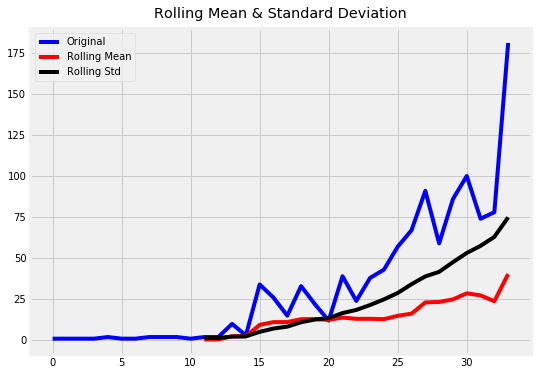

Results of Dickey-Fuller Test:
Test Statistic                  3.926597
p-value                         1.000000
#Lags Used                      7.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [20]:
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

test_stationarity(df['Cases'])

The standard deviation and th mean are clearly increasing with time therefore, this is not a stationary series.

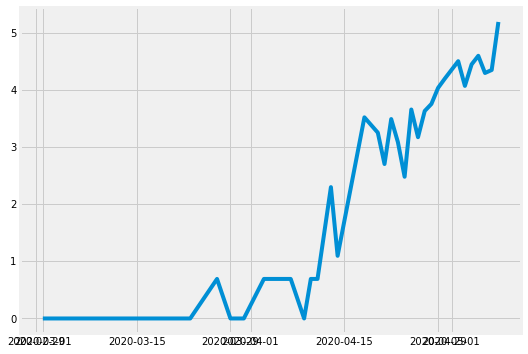

In [21]:
from pylab import rcParams


df = pd.read_csv('../data/NumberConfirmedOfCases.csv', parse_dates=['Date'], index_col='Date')

df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df = df.set_index('Date')




ts_log = np.log(df)
plt.plot(ts_log)

# Remove Trend - Smoothing

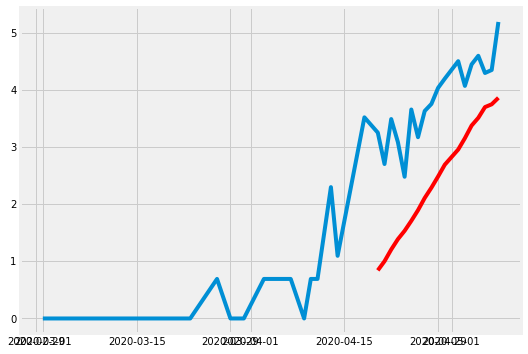

In [22]:
n = int(len(df.Cases)/2)
moving_avg = ts_log.rolling(n).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg_diff = ts_log.Cases - moving_avg.Cases
ts_log_moving_avg_diff.head(n)

Date
2020-03-01       NaN
2020-03-12       NaN
2020-03-19       NaN
2020-03-23       NaN
2020-03-27       NaN
2020-03-29       NaN
2020-03-31       NaN
2020-04-03       NaN
2020-04-05       NaN
2020-04-07       NaN
2020-04-09       NaN
2020-04-10       NaN
2020-04-11       NaN
2020-04-13       NaN
2020-04-14       NaN
2020-04-18       NaN
2020-04-20    2.4143
Name: Cases, dtype: float64

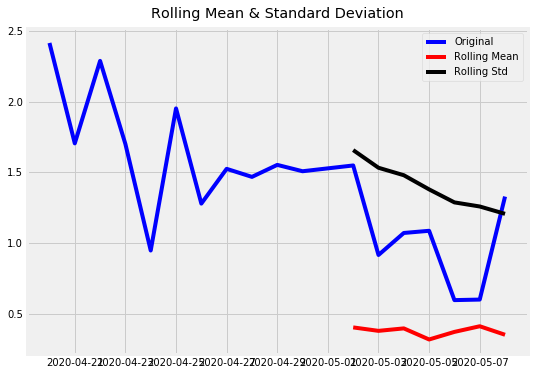

Results of Dickey-Fuller Test:
Test Statistic                 -1.806524
p-value                         0.377228
#Lags Used                      7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

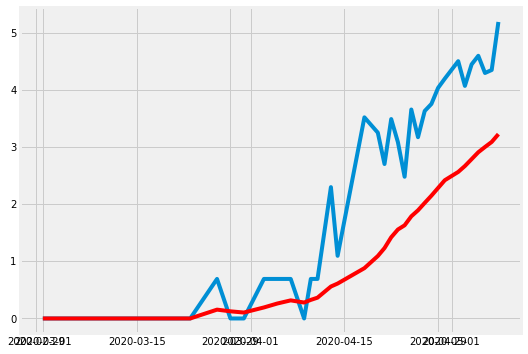

In [25]:
expwighted_avg = ts_log.ewm(n).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

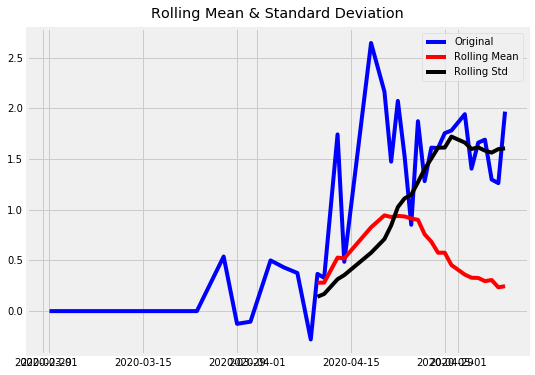

Results of Dickey-Fuller Test:
Test Statistic                 -1.439774
p-value                         0.563067
#Lags Used                      5.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [26]:
ts_log_ewma_diff = ts_log.Cases - expwighted_avg.Cases
test_stationarity(ts_log_ewma_diff)

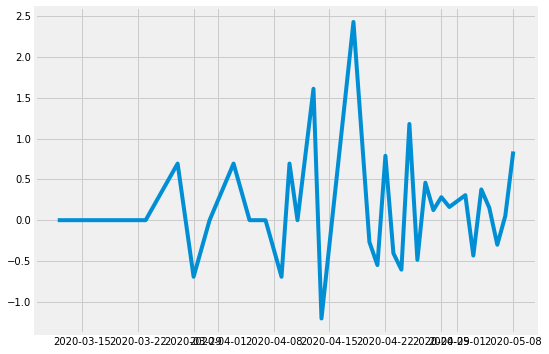

In [27]:
ts_log_diff = ts_log.Cases - ts_log.Cases.shift()
plt.plot(ts_log_diff)

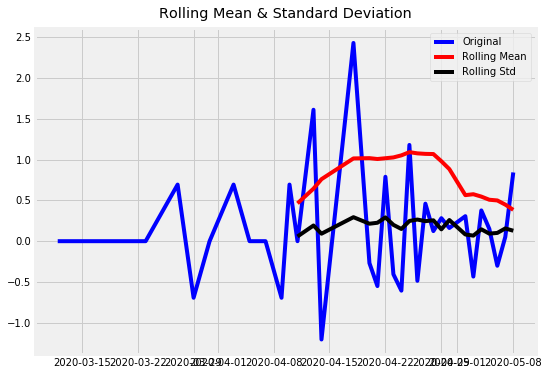

Results of Dickey-Fuller Test:
Test Statistic                -1.037412e+01
p-value                        2.224547e-18
#Lags Used                     0.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (1%)           -3.653520e+00
Critical Value (5%)           -2.957219e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


In [28]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

## Autoregressive Integrated Moving Average (ARIMA)

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
    
Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.




In [29]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(2, 1))
model_fit = model.fit(disp=False)

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Cases   No. Observations:                   33
Model:                     ARMA(2, 1)   Log Likelihood                 -27.738
Method:                       css-mle   S.D. of innovations              0.556
Date:                Sat, 09 May 2020   AIC                             65.477
Time:                        18:28:43   BIC                             72.959
Sample:                             0   HQIC                            67.995
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1503      0.052      2.906      0.004       0.049       0.252
ar.L1.Cases    -0.8228      0.429     -1.918      0.055      -1.664       0.018
ar.L2.Cases    -0.3135      0.269     -1.167      0.243      -0.840       0.213
ma.L1.Cases     0.1202      0.432      0.278      0.781      -0.727       0.967
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3123           -1.2114j            1.7860           -0.3814
AR.2           -1.3123           +1.2114j            1.7860            0.3814
MA.1           -8.3204           +0.0000j            8.3204            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 10.2278')

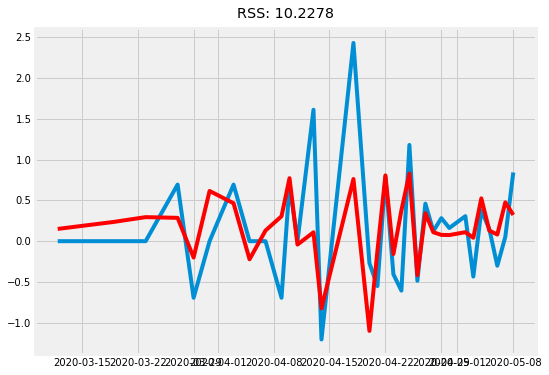

In [31]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

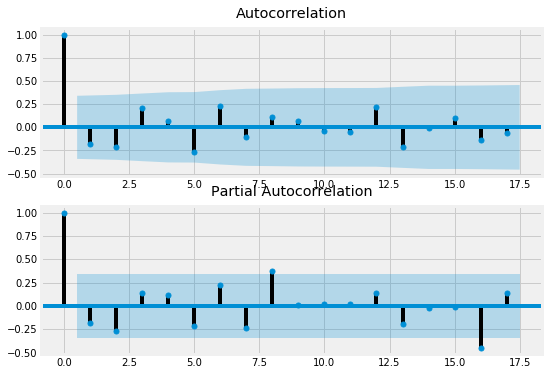

In [32]:
ts = df.Cases - df.Cases.shift()
ts.dropna(inplace=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=n)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=n)
pyplot.show()

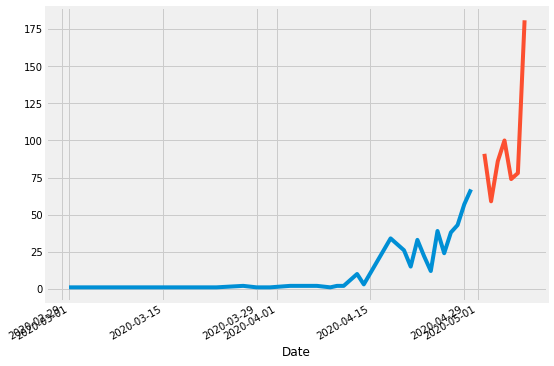

In [33]:
#divide into train and validation set
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]

#plotting the data
train['Cases'].plot()
valid['Cases'].plot()

In [34]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=194.757, BIC=202.306, Time=0.446 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=202.197, BIC=204.713, Time=0.036 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=197.686, BIC=201.461, Time=0.078 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=197.445, BIC=201.220, Time=0.143 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=201.560, BIC=202.818, Time=0.007 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=197.663, BIC=203.954, Time=0.326 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=197.615, BIC=203.905, Time=0.148 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=196.746, BIC=205.553, Time=0.345 seconds
Near non-invertible roots for order (3, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (2, 1, 3)x(0, 0, 0,

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

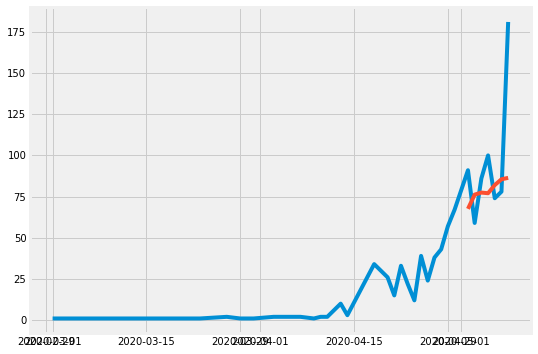

In [35]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(df.Cases, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results
evaluate_forecast(valid, forecast)

NameError: name 'mean_absolute_percentage_error' is not defined

In [ ]:
train.head()

In [ ]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.Cases.values

In [ ]:
train_prophet.head()

In [ ]:
from fbprophet import Prophet

#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet( yearly_seasonality=True, seasonality_mode = 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 36, freq = 'MS') 
future.tail()

In [ ]:
forecast.columns

In [ ]:

# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

In [ ]:
model.plot_components(forecast);

In [ ]:
y_prophet = pd.DataFrame()
y_prophet['ds'] = df.index
y_prophet['y'] = df.Cases.values

In [ ]:
y_prophet = y_prophet.set_index('ds')
forecast_prophet = forecast.set_index('ds')

In [ ]:
start_index =5
end_index = 15
evaluate_forecast(y_prophet.y[start_index:end_index], forecast_prophet.yhat[start_index:end_index])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Cases'], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
#plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
